In [1]:
# import requests
# import numpy as np
# import pandas as pd
# from iexfinance.refdata import get_symbols, get_iex_symbols

import yfinance as yf
import quantstats as qs
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import show, output_notebook
from bokeh.models import LabelSet, ColumnDataSource

import pymongo

output_notebook()

# PyMongo TEST

In [ ]:
client = pymongo.MongoClient()

In [ ]:
client.list_database_names()

['admin', 'config', 'local', 'test']

In [95]:
# client.dash.portfolio.insert_many(
#     [{"stock_name": "LS", "stock_amount": 5, "avg_price": 70000, "curr_price": 70000, "last_update": datetime.today()},
#      {"stock_name": "삼성전자", "stock_amount": 10, "avg_price": 80000, "curr_price": 80000, "last_update": datetime.today()},
#      {"stock_name": "현대차", "stock_amount": 3, "avg_price": 200000, "curr_price": 200000, "last_update": datetime.today()}])

In [184]:
a = list(client.dash.portfolio.find())
df = pd.DataFrame(a)
df

,_id,stock_name,stock_amount,avg_price,curr_price,last_update
0,61120652a07c0ca67c9e840d,LS,5,70000,70000,2021-08-10 13:53:38.717
1,61120652a07c0ca67c9e840e,삼성전자,10,80000,80000,2021-08-10 13:53:38.717
2,61120652a07c0ca67c9e840f,현대차,3,200000,200000,2021-08-10 13:53:38.717


In [185]:
df.loc[:, "total"] = df["stock_amount"] * df["curr_price"]
df = df.loc[:, ["stock_name", "total"]]
df["angle"] = df["total"] / df["total"].sum() * 2 * pi
df["color"] = Category20c[max(len(df), 3)]
df["portion"] = (df["angle"] / (2 * pi) * 100).astype(int)
df["portion"] = [f"{d}%" for d in df["portion"]]
df

,stock_name,total,angle,color,portion
0,LS,350000,1.256637,#3182bd,20%
1,삼성전자,800000,2.872313,#6baed6,45%
2,현대차,600000,2.154235,#9ecae1,34%


In [194]:
text_angle = []
curr_end = 0
for angle in df["angle"]:
    text_angle.append((curr_end + (angle / 2)))
    curr_end += angle
text_angle = np.array(text_angle)
xr = 0.2 * np.cos(text_angle)
yr = (0.5 * np.sin(text_angle)) + 1
df["xr"] = xr
df["yr"] = yr
df

,stock_name,total,angle,color,portion,xr,yr
0,LS,350000,1.256637,#3182bd,20%,0.161803,1.293893
1,삼성전자,800000,2.872313,#6baed6,45%,-0.180194,1.216942
2,현대차,600000,2.154235,#9ecae1,34%,0.094774,0.559702


In [195]:
p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@stock_name: @total", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4, 
        start_angle=cumsum("angle", include_zero=True), 
        end_angle=cumsum("angle"),
        line_color="white", fill_color="color", legend_field="stock_name", source=df)
source = ColumnDataSource(df)
labels = LabelSet(x="xr", y="yr", text='portion',
        angle=0, source=source, render_mode='canvas')
p.add_layout(labels)
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None
show(p)

In [28]:
new_documents = [
  {
    "name": "Sun Bakery Trattoria",
    "stars": 4,
    "categories": ["Pizza","Pasta","Italian","Coffee","Sandwiches"]
  }, {
    "name": "Blue Bagels Grill",
    "stars": 3,
    "categories": ["Bagels","Cookies","Sandwiches"]
  }, {
    "name": "Hot Bakery Cafe",
    "stars": 4,
    "categories": ["Bakery","Cafe","Coffee","Dessert"]
  }, {
    "name": "XYZ Coffee Bar",
    "stars": 5,
    "categories": ["Coffee","Cafe","Bakery","Chocolates"]
  }, {
    "name": "456 Cookies Shop",
    "stars": 4,
    "categories": ["Bakery","Cookies","Cake","Coffee"]
  }
]

collection.insert_many(new_documents)

In [42]:
collection = db.test2

In [44]:
a = collection.find_one({"name": "456 Cookies Sho"})

In [45]:
a is None

True

# yfinance test

In [2]:
samsung = yf.Ticker("005930.KS")

In [16]:
hist = samsung.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04,4654.781960,4740.119629,4391.010982,4740.119629,74195000,0.0,0.0
2000-01-05,4499.623113,4701.330356,4282.399929,4328.947754,74680000,0.0,0.0
2000-01-06,4460.833110,4484.107022,4328.947610,4359.979492,54390000,0.0,0.0
2000-01-07,4313.432938,4398.770640,4158.273480,4297.916992,40305000,0.0,0.0
2000-01-10,4344.463618,4476.349121,4328.947677,4476.349121,46880000,0.0,0.0
...,...,...,...,...,...,...,...
2021-07-22,79000.000000,79800.000000,78900.000000,79700.000000,12618790,0.0,0.0
2021-07-23,79700.000000,79900.000000,79200.000000,79300.000000,9098910,0.0,0.0
2021-07-26,79400.000000,79500.000000,78800.000000,78800.000000,10040975,0.0,0.0


<AxesSubplot:xlabel='Date'>

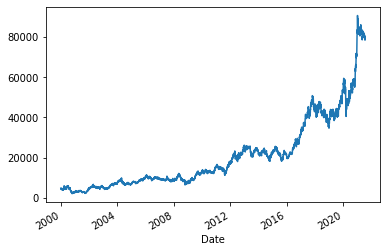

In [14]:
hist["Close"].plot()

In [15]:
samsung.quarterly_balance_sheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Intangible Assets,1.838668e+13,1.242347e+13,1.898080e+13,1.960825e+13
Capital Surplus,4.403893e+12,4.403893e+12,4.403893e+12,4.403893e+12
Total Liab,1.185577e+14,1.022877e+14,9.965255e+13,8.815168e+13
Total Stockholder Equity,2.657673e+14,2.676703e+14,2.679421e+14,2.617454e+14
Minority Interest,8.501337e+12,8.277685e+12,8.194048e+12,8.062452e+12
Other Current Liab,3.964711e+13,2.426526e+13,2.304171e+13,2.094886e+13
Total Assets,3.928263e+14,3.782357e+14,3.757887e+14,3.579595e+14
Common Stock,8.975140e+11,8.975140e+11,8.975140e+11,8.975140e+11
Other Current Assets,4.594468e+12,4.683894e+12,4.774428e+12,4.181535e+12
Retained Earnings,2.660661e+14,2.710682e+14,2.670249e+14,2.601651e+14


In [17]:
samsung.recommendations

# quantstats

In [3]:
stock = qs.utils.download_returns('005930.KS')

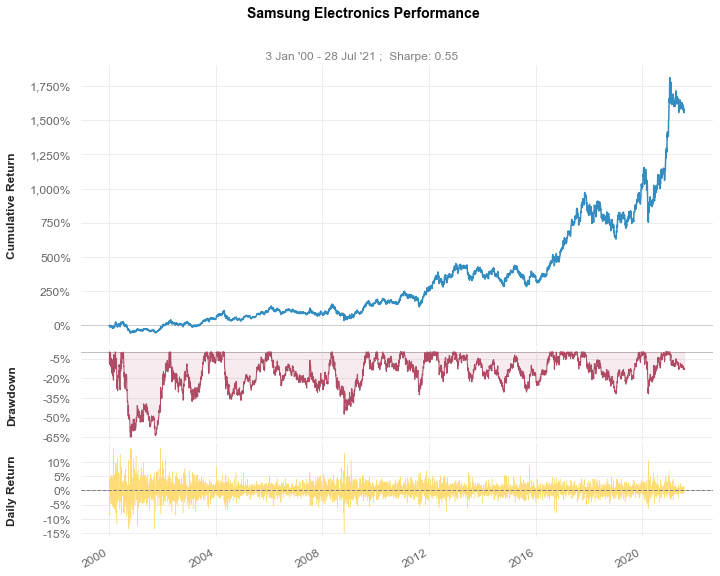

In [4]:
qs.plots.snapshot(stock, title='Samsung Electronics Performance')

In [5]:
qs.reports.metrics(stock, mode = 'basic')

                    Strategy
------------------  ----------
Start Period        2000-01-04
End Period          2021-07-28
Risk-Free Rate      0.0%
Time in Market      95.0%

Cumulative Return   1,570.84%
CAGR%               13.94%

Sharpe              0.55
Sortino             0.81
Sortino/√2          0.57

Max Drawdown        -64.82%
Longest DD Days     1289

Gain/Pain Ratio     0.1
Gain/Pain (1M)      0.59

Payoff Ratio        1.05
Profit Factor       1.1
Common Sense Ratio  1.22
CPC Index           0.59
Tail Ratio          1.1
Outlier Win Ratio   4.03
Outlier Loss Ratio  3.53

MTD                 -1.86%
3M                  -5.15%
6M                  -11.02%
YTD                 -1.79%
1Y                  47.58%
3Y (ann.)           22.96%
5Y (ann.)           24.5%
10Y (ann.)          19.0%
All-time (ann.)     13.94%

Avg. Drawdown       -7.48%
Avg. Drawdown Days  73
Recovery Factor     24.23
Ulcer Index         inf


In [7]:
benchmark_stock = qs.utils.download_returns('TSM')
qs.reports.html(stock, benchmark = benchmark_stock, 
                title = 'SamsungE vs TSMC', 
                output = './comparison_test.html')

# FinanceDataReader
이 패키지에서 제공되는 주가는 [수정 주가](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20수정주가.ipynb)

In [69]:
kospi_stocks = fdr.StockListing('KOSPI')

In [70]:
kospi_stocks

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7172,215620,KOSPI,흥국 S&P코리아로우볼,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7174,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7175,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7176,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## FRED 지표들

In [5]:
# NASDAQ index (IXIC)
df = fdr.DataReader('NASDAQCOM', data_source='fred')
df

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-07-21,14631.95
2021-07-22,14684.60
2021-07-23,14836.99


### 주간 실업수당 청구 건수(ICSA)

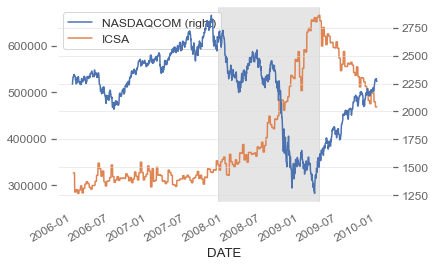

In [6]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

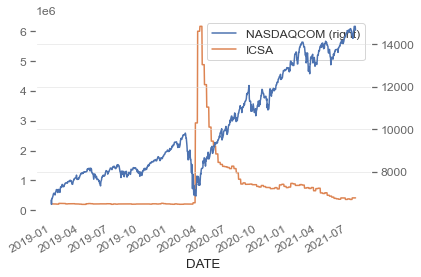

In [7]:
# 최근, 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

### 소비자심리지수 (UMCSENT)

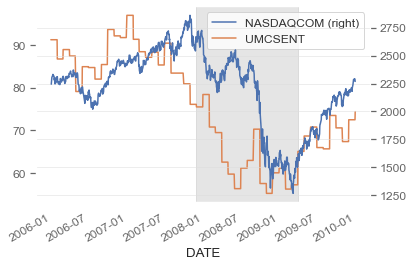

In [8]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT) 

df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

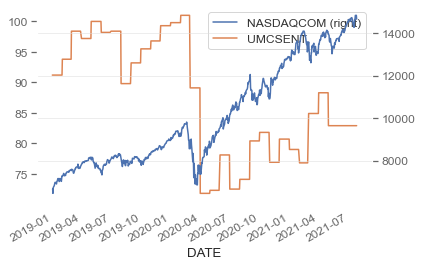

In [9]:
# 최근
df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

### 주택 판매 지수 (HSN1F)

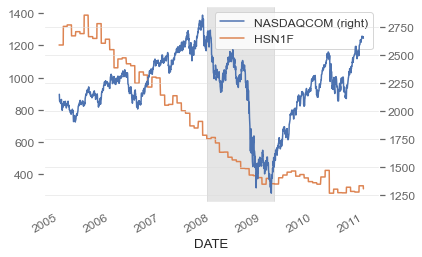

In [10]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

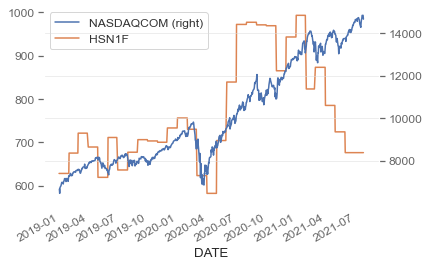

In [11]:
df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

### 실업률 (UNRATE)

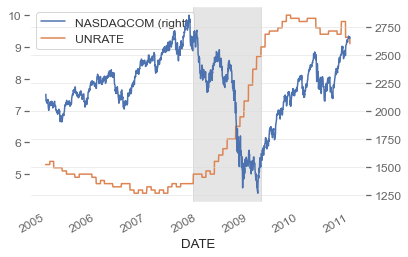

In [12]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

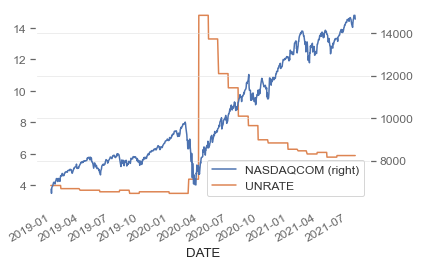

In [13]:
df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

### 5. M2 통화량(M2)
시중 유동성

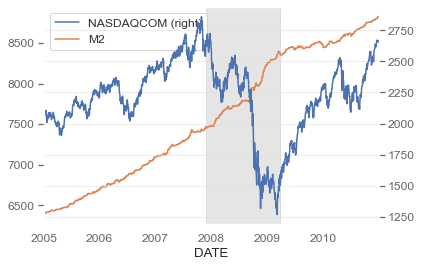

In [14]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2) 

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

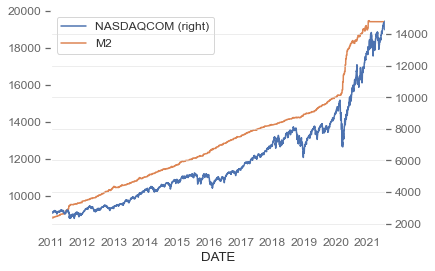

In [15]:
df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

### 하이일드 채권 스프레드 (BAMLH0A0HYM2)
하이일드 채권은 낮은 신용등급 회사에 투자하는 고위험,고수익 채권입니다. 여기서 스프레드는 국채 수익률과의 차이를 이야기합니다.

하이일드 채권 스프레드 = 하이일드 채권 수익률 – 국채 수익률

불황일 수록 하이일드 채권 스프레드는 더 커집니다.

FRED에서 'ICE BofA US High Yield Index Option-Adjusted Spread'라는 하이일드 채권 스프레드 데이터를 제공합니다.

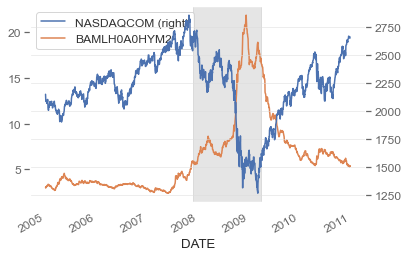

In [16]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드 

df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

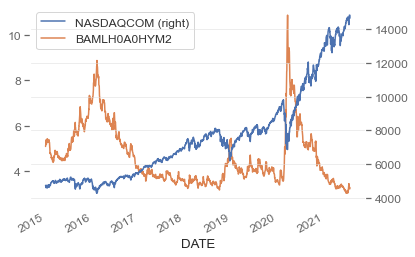

In [17]:
df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2015', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

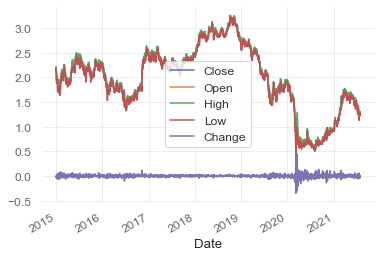

In [22]:
df = fdr.DataReader('US10YT=X', start='2015')
ax = df.plot()

## 여러 종목 가져오기

In [23]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumSquare'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [24]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [25]:
df_list = [fdr.DataReader(code, '2019-01-01', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [26]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201192,337000,237000,104000,118000
2019-01-03,37600,57700,116500,197440,328000,237000,104500,122000
2019-01-04,37450,58300,119500,206350,330500,239000,107000,125500
2019-01-07,38750,58700,120500,202599,343000,246000,108000,131500
2019-01-08,38100,59200,119500,200254,349500,245500,107000,130000
2019-01-09,39600,63600,123000,200723,352000,255500,109000,133000
2019-01-10,39800,65300,123000,203067,347000,258500,108500,131000
2019-01-11,40500,65100,123000,203067,349000,255500,109000,131000
2019-01-14,40050,62100,121500,197909,350500,250000,109500,127000


<AxesSubplot:xlabel='Date'>

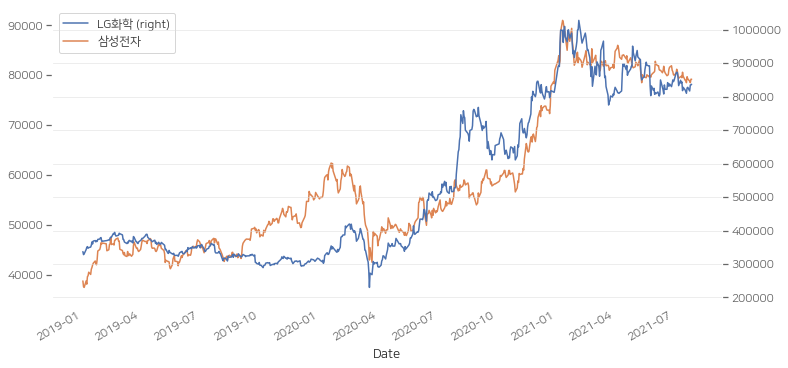

In [27]:
df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

<AxesSubplot:xlabel='Date'>

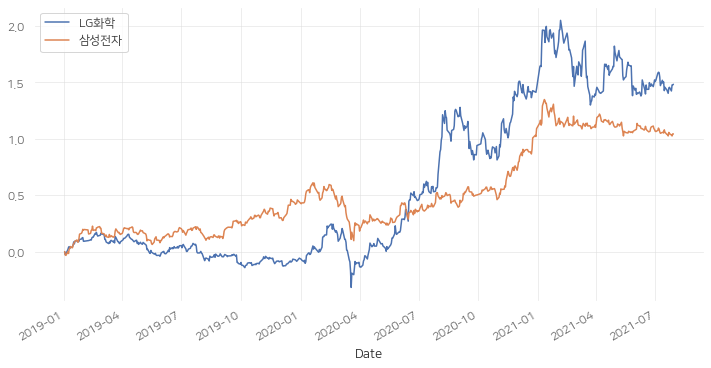

In [28]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

NAVER     2.750000
LG화학      1.483680
삼성전자      1.043871
현대차       0.956140
SK하이닉스    0.897690
POSCO     0.527426
삼성물산      0.379808
셀트리온      0.307209
Name: 2021-07-29 00:00:00, dtype: float64


<AxesSubplot:xlabel='Date'>

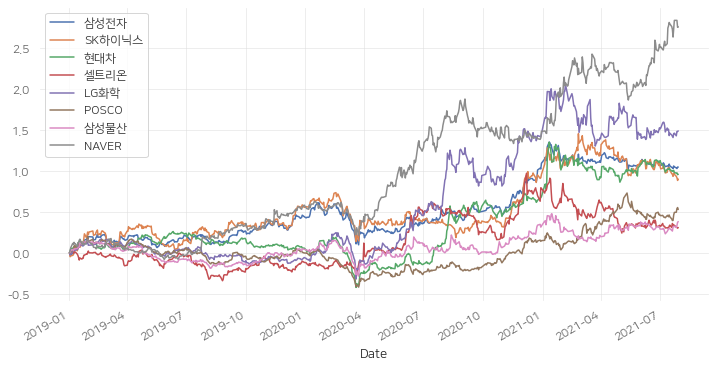

In [30]:
df_norm = df / df.iloc[0] - 1
print(df_norm.iloc[-1].sort_values(ascending=False))
df_norm.plot()

## VIX 지수와 관련 종목
VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 CBOE VIX라고 표기하기도 합니다.

주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 '공포지수'라고도 부르기도 합니다.

VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

In [31]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [32]:
vix = fdr.DataReader('VIX', '1990-01-01', '2021-07-09') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-07-02,15.07,15.53,15.54,14.25,0.0,-0.0265
2021-07-06,16.44,15.77,17.94,15.73,0.0,0.0909
2021-07-07,16.20,16.43,17.64,16.08,0.0,-0.0146
2021-07-08,19.00,17.74,21.29,17.74,0.0,0.1728
2021-07-09,16.18,17.88,18.13,16.08,0.0,-0.1484


Text(2020-03-09, 54.46, '54.46')

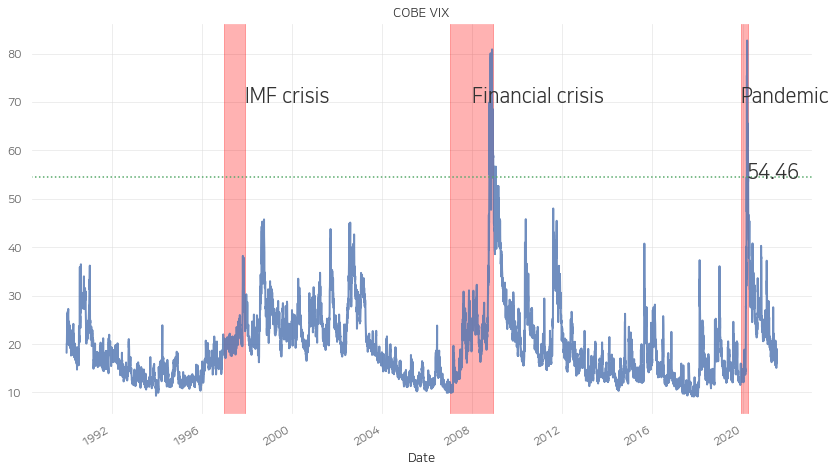

In [33]:
#@vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2020-04', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09 VIX 4.46
ax.axhline(54.46, ls=':', c='g') # 51.55 (2020-03-09 VIX)
ax.annotate('54.46', xy=('2020-03-09', 54.46), fontsize=20)

In [34]:
end_date = '2020-07-31'
vix = fdr.DataReader('VIX', '2010-01-01', end_date) # S&P 500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01', end_date) # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01', end_date) # S&P 500 index

df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

<AxesSubplot:xlabel='Date'>

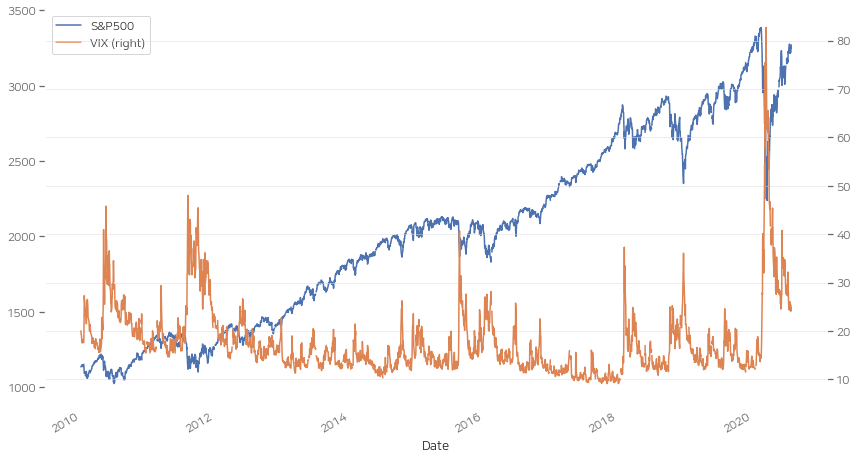

In [35]:
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

<AxesSubplot:xlabel='Date'>

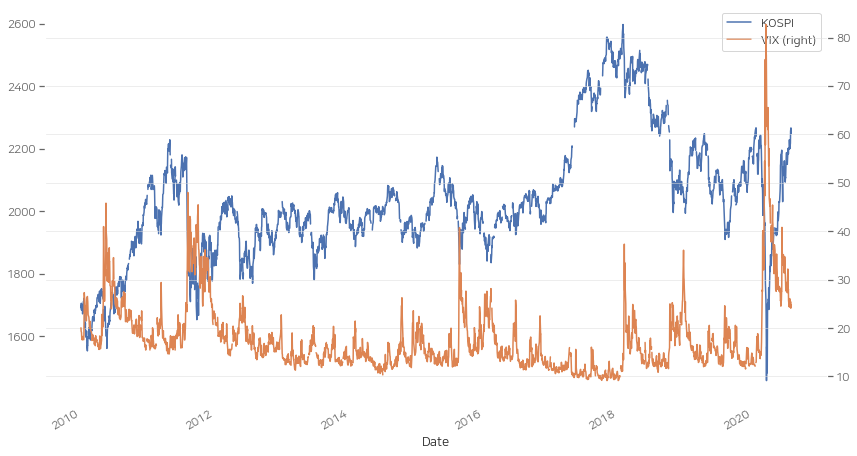

In [36]:
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

In [37]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.469619,-0.192151
KOSPI,-0.469619,1.000000,0.659353
S&P500,-0.192151,0.659353,1.000000


### VIX 관련 종목
VIX 관련한 투자 가능한 종목들의 심볼과 가격들을 살펴봅니다.

#### 국내 VIX관련 ETN
- `530065`: 삼성 S&P500 VIX S/T 선물 ETN(H) B
- `500045`: 신한 S&P500 VIX S/T 선물 ETN B
- `550058`: QV S&P500 VIX S/T 선물 ETN B
#### 해외선물
- `VX`: S&P 500 VIX 선물 (해외선물)
#### 미국 ETF
- `VXX`: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
- `VIXY`: ProShares VIX Short-Term Futures ETF (NYSE)
- `VIXM`: ProShares VIX Mid-Term Futures ETF (NYSE)
- `VIIX`: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
- `VXZ`: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
- `XVZ`: iPath S&P 500 Dynamic VIX ETN (NYSE)
- `EVIX`: VelocityShares 1X Long VSTOXX Futures ETN (NYSE)

<AxesSubplot:xlabel='Date'>

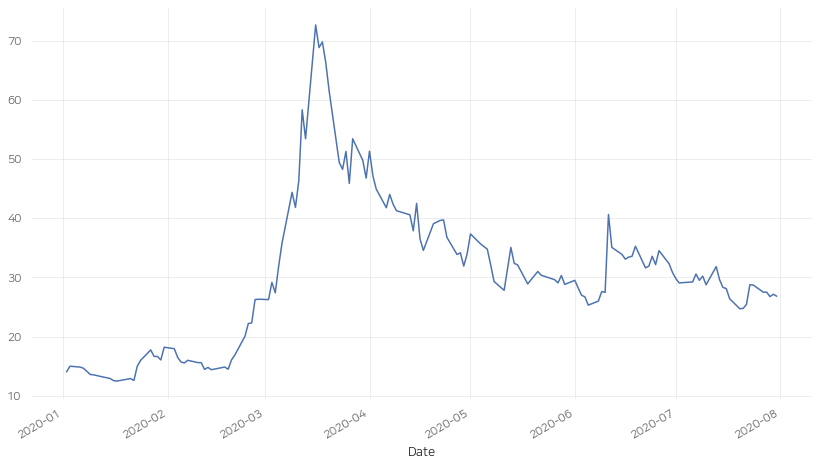

In [38]:
end_date = '2020-07-31'
fdr.DataReader('VX', '2020-01-01', end_date)['Close'].plot()

<AxesSubplot:xlabel='Date'>

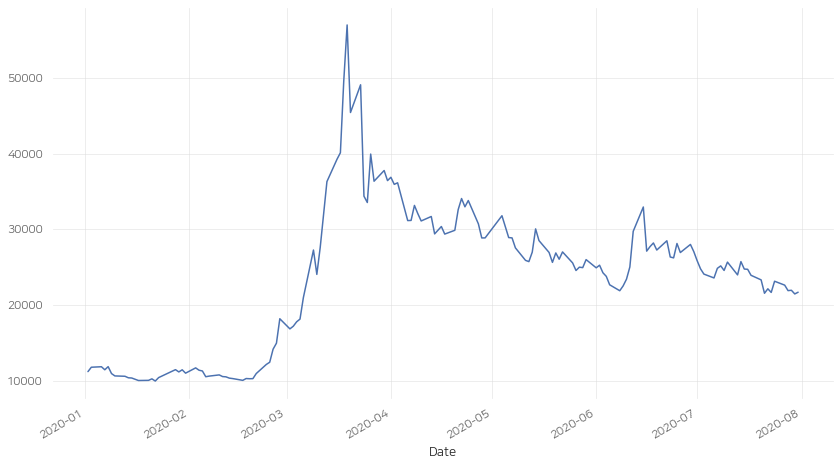

In [39]:
fdr.DataReader('530065', '2020-01-01', end_date)['Close'].plot()

## 섹터 평균 수익률
요약
- KRX 전체종목과 섹터정보를 가져옵니다
- groupby()를 활용하여 섹터별로 묶어 냅니다
- groupby()에 간단한 통계함수를 적용하여 count, sum, mean 등을 구할 수 있습니다
- 섹터 개별 종목들의 데이터를 수집하고 종가(Close)를 취합 합니다
- 섹터종목의 들의 개별 수익률과 섹터 전체의 평균 수익률을 계산합니다
- 기간을 지정하여(timedelta 활용) 다양한 기간의 수익률을 계산합니다
- 데이터프레임 스타일을 적용하여 주요 셀을 강조합니다
- 스타일을 적용한 데이터프레임을 엑셀로 저장합니다

In [40]:
krx = fdr.StockListing('KRX')
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7189,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7190,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7191,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7192,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [42]:
krx.groupby('Sector')
krx.groupby('Sector').count()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
1차 비철금속 제조업,18,18,18,17,18,18,18,17,18
1차 철강 제조업,57,57,57,57,57,57,57,56,57
가구 제조업,8,8,8,8,8,8,8,8,8
가전제품 및 정보통신장비 소매업,2,2,2,2,2,2,2,2,2
가정용 기기 제조업,9,9,9,9,9,9,9,8,9
...,...,...,...,...,...,...,...,...,...
해상 운송업,5,5,5,5,5,5,5,4,5
"해체, 선별 및 원료 재생업",1,1,1,1,1,1,1,1,1
화학섬유 제조업,10,10,10,10,10,10,10,9,10


In [43]:
krx.groupby('Sector').count().sort_values('Symbol', ascending=False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
특수 목적용 기계 제조업,143,143,143,143,143,143,143,135,143
소프트웨어 개발 및 공급업,141,141,141,140,141,141,141,135,141
전자부품 제조업,125,125,125,124,125,125,125,117,125
자동차 신품 부품 제조업,96,96,96,96,96,96,96,93,96
의약품 제조업,94,94,94,94,94,94,94,91,94
기타 화학제품 제조업,93,93,93,93,93,93,93,85,93
기타 금융업,92,92,92,90,92,92,92,80,92
금융 지원 서비스업,74,74,74,73,74,74,74,22,74
통신 및 방송 장비 제조업,71,71,71,71,71,71,71,64,71


In [57]:
sectors = dict(list(krx.groupby('Sector')))

print('count:', len(sectors))
list(sectors.keys())[:10]

count: 160


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

In [58]:
med_sec = sectors['기타 화학제품 제조업']

print('row count:', len(med_sec))
med_sec.head(10)

row count: 93


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
68,083660,KOSDAQ,CSA 코스믹,기타 화학제품 제조업,"물탱크,상하수도용도류벽,축산탱크",2006-07-25,12월,조성아,http://www.gentro.co.kr,서울특별시
139,089470,KOSPI,HDC현대EP,기타 화학제품 제조업,"합성수지(PP컴파운딩가공,자동차범퍼,내장제) 제조,도소매",2006-09-25,12월,정 중 규,http://www.hdc-hyundaiep.com/,충청남도
1257,002380,KOSPI,KCC,기타 화학제품 제조업,"건축용단열재,내외장재,스레트,밤라이트,암면,석고보드,판유리 제조",1973-06-25,12월,"정몽진, 민병삼",http://www.kccworld.co.kr,서울특별시
1260,036670,KOSDAQ,KCI,기타 화학제품 제조업,"폴리머,레진,계면활성제",2001-01-03,12월,이진용,http://www.kciltd.com,충청남도
1493,051900,KOSPI,LG생활건강,기타 화학제품 제조업,"화장품,생활용품 제조,도매",2001-04-25,12월,차 석 용,http://www.lgcare.com,서울특별시
1844,011790,KOSPI,SKC,기타 화학제품 제조업,"폴리에스테르필름,합성수지,LCD용 필름 제조",1997-07-18,12월,이완재,http://www.skc.kr,경기도
2057,317240,KOSDAQ,TS트릴리온,기타 화학제품 제조업,기업인수합병,2019-04-29,12월,장기영,NaN,서울특별시
2071,000860,KOSPI,강남제비스코,기타 화학제품 제조업,"도료(페인트,락카,신나,에나멜,바니쉬),안료 제조,판매",1975-11-12,12월,"황익준,김재현(각자대표이사)",http://www.jevisco.com,부산광역시
2135,083420,KOSPI,그린케미칼,기타 화학제품 제조업,"비이온계면활성제 제조,도매",2005-10-20,12월,양준화,http://www.korgc.com,충청남도
2168,121600,KOSDAQ,나노신소재,기타 화학제품 제조업,"인듐계 산화물 TCO Target, 반도체 CMP Slurry 등",2011-02-09,12월,박장우,http://anapro.com,세종특별자치시


In [59]:
med = pd.DataFrame()

for ix, row in med_sec.iterrows():
  code, name = row['Symbol'], row['Name']
  print(code, name)
  # 개별 종목의 가격을 가져옵니다
  df = fdr.DataReader(code, '2019-01-01', '2021-12-31')

  # 가격 데이터의 종가(Close)를 컬럼으로 추가합니다
  # (컬럼명은 종목명을 지정합니다)
  med[name] = df['Close']

083660 CSA 코스믹
089470 HDC현대EP
002380 KCC
036670 KCI
051900 LG생활건강
011790 SKC
317240 TS트릴리온
000860 강남제비스코
083420 그린케미칼
121600 나노신소재
257990 나우코스
092730 네오팜
317860 노드메이슨
090350 노루페인트
060900 대한그린파워
317330 덕산테코피아
092070 디엔에프
171120 라이온켐텍
214260 라파스
281740 레이크머티리얼즈
016100 리더스코스메틱
014100 메디앙스
241770 메카로
002840 미원상사
134380 미원화학
002760 보락
226340 본느
215050 비엔디생활건강
000390 삼화페인트
008490 서흥
086710 선진뷰티사이언스
252500 세화피앤씨
357780 솔브레인
004430 송원산업
159910 스킨앤스킨
103660 씨앗
352480 씨앤씨인터내셔널
286000 씨엔티드림
260930 씨티케이
002790 아모레G
090430 아모레퍼시픽
227610 아우딘퓨쳐스
018250 애경산업
217480 에스디생명공학
270210 에스알바이오텍
078520 에이블씨엔씨
138360 에이씨티
086520 에코프로
383310 에코프로에이치엔
265740 엔에프씨
225860 엠앤씨생명과학
045060 오공
344860 이노진
101360 이엔드디
102710 이엔에프테크놀로지
240340 인터코스
081000 일진다이아
226320 잇츠한불
950140 잉글우드랩
049550 잉크테크
221610 자안바이오
110020 전진바이오팜
066830 제노텍
123330 제닉
137950 제이씨케미칼
025620 제이준코스메틱
004910 조광페인트
250030 진코스텍
233990 질경이
221980 케이디켐
225430 케이엠제약
042040 케이피엠테크
089010 켐트로닉스
220260 켐트로스
080530 코디
027050 코리아나
082660 코스나인
192820 코스맥스
24171

In [60]:
med

,CSA 코스믹,HDC현대EP,KCC,KCI,LG생활건강,SKC,TS트릴리온,강남제비스코,그린케미칼,나노신소재,...,토니모리,한국미라클피플사,한국알콜,한국콜마,한국화장품제조,한농화성,한화,현대바이오,현대바이오랜드,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,3791,4345,270846,7780,1081000,35450,NaN,24550,2983,14950,...,10700,NaN,7120,70000,34600,3990,31000,5510,15600,23400
2019-01-03,3624,4295,277869,7810,1095000,34950,NaN,24300,2975,14850,...,10600,NaN,7020,69600,33650,3980,29950,5240,14850,23050
2019-01-04,3673,4375,271724,7710,1104000,35150,NaN,24000,2933,14950,...,10750,NaN,7050,70100,33700,3865,29900,5330,14950,22200
2019-01-07,3928,4605,266456,7810,1086000,37300,NaN,24600,2942,14950,...,11200,NaN,7090,70900,34050,3895,30900,5560,14800,22200
2019-01-08,4031,4585,266456,7740,1084000,36950,NaN,24400,2913,14650,...,12350,NaN,7080,68400,34750,3825,30050,5270,14600,22300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,1635,5900,336000,10000,1527000,159500,1235.0,32200,11900,34150,...,8300,18350.0,13950,55300,33850,15400,30400,33150,21600,24500
2021-07-26,1610,5840,322000,10300,1480000,161000,1205.0,31750,12750,34900,...,8180,18350.0,13850,55200,33550,15200,30100,32000,21250,24450
2021-07-27,1575,5860,322500,10400,1476000,164000,1205.0,31500,12250,36450,...,8250,18350.0,13950,56100,33650,15900,30100,32050,21200,24500


In [61]:
med = med.dropna(axis=1)
med

,CSA 코스믹,HDC현대EP,KCC,KCI,LG생활건강,SKC,강남제비스코,그린케미칼,나노신소재,네오팜,...,클리오,토니모리,한국알콜,한국콜마,한국화장품제조,한농화성,한화,현대바이오,현대바이오랜드,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,3791,4345,270846,7780,1081000,35450,24550,2983,14950,44000,...,13900,10700,7120,70000,34600,3990,31000,5510,15600,23400
2019-01-03,3624,4295,277869,7810,1095000,34950,24300,2975,14850,42250,...,12950,10600,7020,69600,33650,3980,29950,5240,14850,23050
2019-01-04,3673,4375,271724,7710,1104000,35150,24000,2933,14950,43400,...,10950,10750,7050,70100,33700,3865,29900,5330,14950,22200
2019-01-07,3928,4605,266456,7810,1086000,37300,24600,2942,14950,43250,...,10900,11200,7090,70900,34050,3895,30900,5560,14800,22200
2019-01-08,4031,4585,266456,7740,1084000,36950,24400,2913,14650,42950,...,11150,12350,7080,68400,34750,3825,30050,5270,14600,22300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,1635,5900,336000,10000,1527000,159500,32200,11900,34150,33100,...,23300,8300,13950,55300,33850,15400,30400,33150,21600,24500
2021-07-26,1610,5840,322000,10300,1480000,161000,31750,12750,34900,32550,...,22750,8180,13850,55200,33550,15200,30100,32000,21250,24450
2021-07-27,1575,5860,322500,10400,1476000,164000,31500,12250,36450,32650,...,22900,8250,13950,56100,33650,15900,30100,32050,21200,24500


In [62]:
# 상장 첫날을 0으로 상대 수익률
acc_rets = med / med.iloc[0] - 1.0
acc_rets

,CSA 코스믹,HDC현대EP,KCC,KCI,LG생활건강,SKC,강남제비스코,그린케미칼,나노신소재,네오팜,...,클리오,토니모리,한국알콜,한국콜마,한국화장품제조,한농화성,한화,현대바이오,현대바이오랜드,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.044052,-0.011507,0.025930,0.003856,0.012951,-0.014104,-0.010183,-0.002682,-0.006689,-0.039773,...,-0.068345,-0.009346,-0.014045,-0.005714,-0.027457,-0.002506,-0.033871,-0.049002,-0.048077,-0.014957
2019-01-04,-0.031126,0.006904,0.003242,-0.008997,0.021277,-0.008463,-0.022403,-0.016762,0.000000,-0.013636,...,-0.212230,0.004673,-0.009831,0.001429,-0.026012,-0.031328,-0.035484,-0.032668,-0.041667,-0.051282
2019-01-07,0.036138,0.059839,-0.016208,0.003856,0.004625,0.052186,0.002037,-0.013745,0.000000,-0.017045,...,-0.215827,0.046729,-0.004213,0.012857,-0.015896,-0.023810,-0.003226,0.009074,-0.051282,-0.051282
2019-01-08,0.063308,0.055236,-0.016208,-0.005141,0.002775,0.042313,-0.006110,-0.023466,-0.020067,-0.023864,...,-0.197842,0.154206,-0.005618,-0.022857,0.004335,-0.041353,-0.030645,-0.043557,-0.064103,-0.047009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,-0.568715,0.357883,0.240557,0.285347,0.412581,3.499295,0.311609,2.989273,1.284281,-0.247727,...,0.676259,-0.224299,0.959270,-0.210000,-0.021676,2.859649,-0.019355,5.016334,0.384615,0.047009
2021-07-26,-0.575310,0.344074,0.188867,0.323907,0.369103,3.541608,0.293279,3.274221,1.334448,-0.260227,...,0.636691,-0.235514,0.945225,-0.211429,-0.030347,2.809524,-0.029032,4.807623,0.362179,0.044872
2021-07-27,-0.584542,0.348677,0.190714,0.336761,0.365402,3.626234,0.283096,3.106604,1.438127,-0.257955,...,0.647482,-0.228972,0.959270,-0.198571,-0.027457,2.984962,-0.029032,4.816697,0.358974,0.047009


In [63]:
returns = acc_rets.iloc[-1]
returns.sort_values(ascending=False)

이엔드디       67.900000
현대바이오       4.807623
미원상사        4.721136
SKC         3.513399
그린케미칼       3.207174
             ...    
에스알바이오텍    -0.698263
코스온        -0.734879
제이준코스메틱    -0.806365
질경이        -0.881250
엠앤씨생명과학    -0.931507
Name: 2021-07-29 00:00:00, Length: 79, dtype: float64

In [66]:
the_day = datetime(2021, 7, 30)
row_dict = {}
for days in [5, 10, 20, 60, 120, 240]:
  start = the_day - timedelta(days * 30)
  end = the_day

  df = med[start:end] # 특정 기간
  acc_rets = df / df.iloc[0] - 1.0
  row_dict[days] = acc_rets.iloc[-1]

In [68]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
CSA 코스믹,-0.466102,-0.458763,-0.614914,-0.584542,-0.584542,-0.584542
HDC현대EP,-0.062400,0.035336,0.268398,0.348677,0.348677,0.348677
KCC,0.661692,1.175896,0.753152,0.233173,0.233173,0.233173
KCI,0.118996,-0.050926,-0.004854,0.317481,0.317481,0.317481
LG생활건강,-0.011960,-0.008005,0.173639,0.375578,0.375578,0.375578
...,...,...,...,...,...,...
한농화성,-0.187335,1.361963,2.577236,2.859649,2.859649,2.859649
한화,0.018613,0.135849,0.256785,-0.029032,-0.029032,-0.029032
현대바이오,-0.396226,1.857143,1.277580,4.807623,4.807623,4.807623
현대바이오랜드,-0.048889,-0.137097,0.123360,0.371795,0.371795,0.371795


In [70]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,5,10,20,60,120,240
CSA 코스믹,-0.466102,-0.458763,-0.614914,-0.584542,-0.584542,-0.584542
HDC현대EP,-0.062400,0.035336,0.268398,0.348677,0.348677,0.348677
KCC,0.661692,1.175896,0.753152,0.233173,0.233173,0.233173
KCI,0.118996,-0.050926,-0.004854,0.317481,0.317481,0.317481
LG생활건강,-0.011960,-0.008005,0.173639,0.375578,0.375578,0.375578
SKC,0.373391,0.909308,2.567447,3.513399,3.513399,3.513399
강남제비스코,0.365801,1.042071,0.613811,0.285132,0.285132,0.285132
그린케미칼,0.000000,2.255512,2.751868,3.207174,3.207174,3.207174
나노신소재,0.307692,0.109792,1.374603,1.501672,1.501672,1.501672
네오팜,-0.001543,0.141093,-0.304301,-0.264773,-0.264773,-0.264773


## 차트 그리기

fdr.chart.plot(df) 에 지정 가능한 인자와 기본값

- width: 차트의 너비를 지정합니다 (pixel값) (기본값: 800)
- height: 차트의 높이를 지정합니다 (pixel값) (기본값: 480)
- volume_height: 0.3, # 30% size of figure height
- recent_high: 이전 고점을 표시할지 여부(기본값: False)
- volume: 거래량 막대를 표시할지 여부 (기본값: True)
- title: 제목을 지정합니다. 차트 왼쪽 상단에 표시됩니다 (기본값: '')
- ylabel: y축의 레이블을 지정합니다. 차트 왼쪽에 표시됩니다 (기본값: '')
- moving_average_type: 이동평균을 표시합니다. 'SMA', 'WMA', 'EMA', 'None'중 하나를 지정할 수 있습니다. (기본값: 'SMA')
- moving_average_lines: 이동평균선의 데이터 개수와 몇개캔들을 사용할지 지정합니다. (기본값: (5, 20, 60) - 즉, 5일, 20일, 60일을 표시합니다)
- color_up: 상승캔들의 색상 (기본값:'red')
- color_down: 하락캔들의 색상 (기본값:'blue')
- color_volume_up: 전일거래량 대비 상승 막대의 색상 (기본값:'red')
- color_volume_down: 전일거래량 대비 하락 막대의 색상 (기본값:'blue')
- moving_average_type은 이동평균선의 종류를 지정합니다. 종류는 다음과 같습니다.

'SMA'(Simple Moving Average, 단순 이동평균) - 기본값
'WMA'(Weighted Moving Average, 가중 이동평균)
'EMA'(Exponential Moving Average, 지수 이동평균)
'None'(표시하지 않음)

In [72]:
krx = fdr.StockListing("KRX")
krx.loc[krx.Name == "나노신소재"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2168,121600,KOSDAQ,나노신소재,기타 화학제품 제조업,"인듐계 산화물 TCO Target, 반도체 CMP Slurry 등",2011-02-09,12월,박장우,http://anapro.com,세종특별자치시


In [77]:
df = fdr.DataReader('121600', '2020-01-01', '2021-07-15')
fdr.chart.plot(df, title="나노신소재")

Loading BokehJS ...

In [78]:
config = {'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
          'width': 600, 
          'height': 300,
          'volume': True,
}

fdr.chart.config(config=config)

In [79]:
fdr.chart.plot(df)

Loading BokehJS ...

config 원래대로

In [81]:
fdr.chart.config(reset=True)
df = fdr.DataReader('121600', '2021')

fdr.chart.plot(df)

Loading BokehJS ...